In [2]:
import numpy as np
import pandas as pd



In [3]:
# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

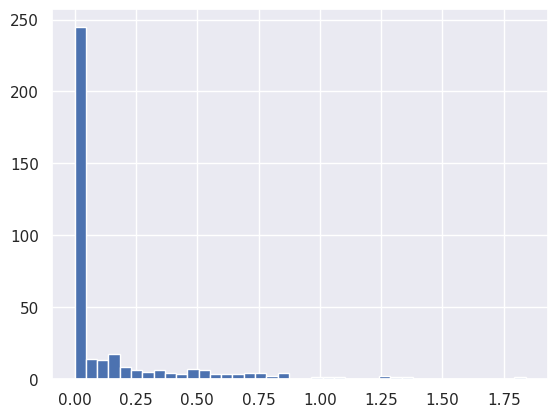

In [11]:
plt.hist(inches, 40);

In [12]:
np.sum((inches > 0.5) & (inches < 1))

29

In [13]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) & (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


In [15]:
############## Masks on arrays ################3

# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ", np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ", np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):", np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


In [4]:
############## Fancy Indexing ###############

# two-dimentional normally distributed dots:

rand = np.random.RandomState(42)
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

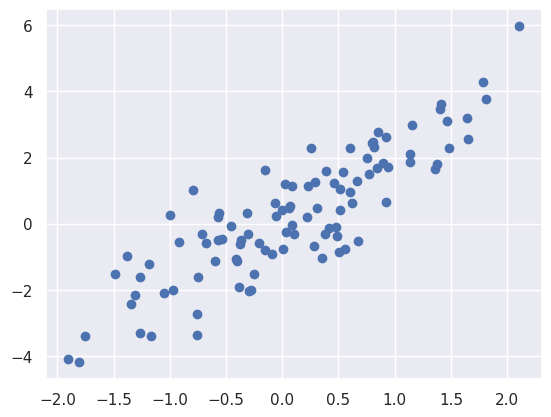

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

In [6]:
# Let's use fancy indexing to select 20 random points

indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([70,  2, 31, 95, 58, 71, 46, 28, 11, 52, 36, 79, 15, 88, 96, 98, 22,
       38, 57, 20])

In [7]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

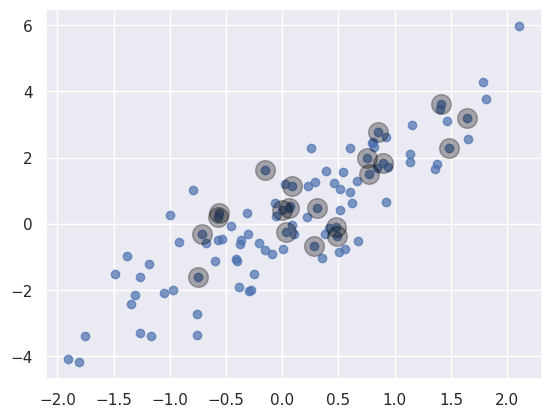

In [15]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='black', alpha=0.3, s=200);